# 最小二乗法をやってみよう

ここでは，PythonとライブラリのNumpyに慣れるために，最小二乗法を実装してみることにする．

## 目次
1. 真のモデルからデータを生成する
1. 真のモデルにノイズ（正規乱数）の影響を与えて生成する
1. 最小二乗法を適用する(次数1の近似関数を愚直に求める)
1. 最小二乗法を適用する(Numpyライブラリで一発で求める)
1. デモ（次数可変版）

## 1. 真のモデルからデータを生成する

真のモデルとして，以下の関数を仮定する．

$$
f(x) = x^4-8x^3+18x^2-3x+1
$$

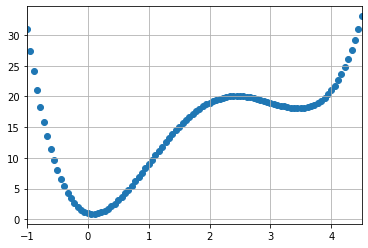

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# 真のモデル
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x + 1
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100

# xを連番で生成する．
dataX = np.linspace(xmin, xmax, num)

# ｘからｙを生成する．
dataY = mathfunc(dataX)

# グラフ表示
plt.scatter(dataX, dataY)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

## 2. データは，真のモデルにノイズ（正規乱数）の影響を受ける

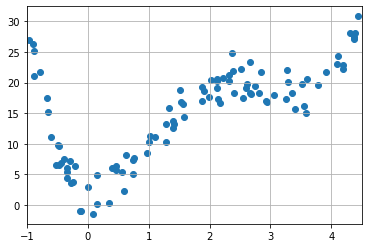

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# 真のモデル
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x + 1
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100

# 乱数の種を設定
np.random.seed(0)

# ランダムにxを生成して，昇順にソート
dataX = (xmax - xmin) * np.random.rand(num) + xmin
dataX = np.sort(dataX)

# xからｙを生成する
dataY = mathfunc(dataX)

# yにノイズ（正規乱数（平均0．0， 標準偏差2.0））を加える
dataY += np.random.normal(loc=0.0, scale=2.0, size=num)

# グラフ表示
plt.scatter(dataX, dataY)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

In [68]:
# データの確認 (x)
dataX

array([-0.97417488, -0.8966561 , -0.8894085 , -0.88879881, -0.78446714,
       -0.66875991, -0.64718877, -0.60930168, -0.52078885, -0.48332719,
       -0.47145876, -0.46594298, -0.43875354, -0.39293672, -0.34949066,
       -0.34699755, -0.33891891, -0.29090536, -0.27511176, -0.23999377,
       -0.21155692, -0.12566729, -0.11279765,  0.00755249,  0.08120299,
        0.14882216,  0.15710409,  0.34434076,  0.39310381,  0.45505587,
        0.4596422 ,  0.55543829,  0.59173351,  0.62877109,  0.73485593,
        0.74890749,  0.75212924,  0.97729345,  1.00040924,  1.02798844,
        1.10892835,  1.27844647,  1.28064067,  1.3301014 ,  1.40367575,
        1.40672966,  1.41230832,  1.50882683,  1.53813649,  1.56470925,
        1.57758161,  1.87016577,  1.87786429,  1.90892206,  1.99685751,
        2.01847427,  2.116308  ,  2.12424509,  2.12638672,  2.13608224,
        2.16770573,  2.22582114,  2.31519857,  2.32665036,  2.36652647,
        2.39313698,  2.39699523,  2.51956562,  2.55241762,  2.59

In [69]:
# データの確認 (y)
dataY

array([26.97122407, 26.37711925, 25.09267572, 21.05423889, 21.64762333,
       17.44116657, 15.18254025, 11.09797337,  6.50639176,  9.72161138,
        6.49669006,  9.60696473,  6.91064952,  7.42046736,  5.31621552,
        5.97021652,  4.42998168,  7.17183046,  3.61382244,  3.67460698,
        6.28433731, -1.01812947, -0.9619143 ,  2.91715922, -1.47540521,
        4.81356211,  0.1153087 ,  0.2937677 ,  5.9860307 ,  5.61225893,
        6.42683151,  5.42329078,  2.27006893,  8.21778345,  5.09662261,
        7.40800807,  7.73687553,  8.3948418 , 10.23347886, 11.20817596,
       11.16389054, 10.34065927, 13.16259594, 15.81208319, 12.62208053,
       13.74644373, 13.23823387, 18.85335717, 16.8008691 , 16.53750363,
       14.30929198, 19.32846982, 16.95137589, 18.55856907, 17.71253612,
       20.44319027, 20.65373932, 19.11224517, 20.32836056, 17.38352085,
       16.68805321, 20.70451849, 20.32310946, 21.27449691, 24.81091966,
       21.95119153, 18.23853983, 22.28504223, 17.39240773, 19.05

## 3. 最小二乗法を適用する(次数1の近似関数を愚直に求める)
次数1，つまりy=ax+bの直線で近似する．

In [70]:
# 連立1次方程式 Ax = bの行列Aとベクトルbを求める
# 次数1のとき，正規方程式の行列は2行2列になる
matrixA = np.zeros((2,2))
b = np.zeros((2,1))

In [71]:
matrixA[0,0] = sum(dataX * dataX)
matrixA[0,1] = sum(dataX)
matrixA[1,0] = sum(dataX)
matrixA[1,1] = len(dataX)

b[0,0] = sum(dataX*dataY)
b[1,0] = sum(dataY)

In [72]:
matrixA

array([[507.5485627 , 160.03661173],
       [160.03661173, 100.        ]])

In [73]:
b

array([[3204.6200935 ],
       [1497.84542718]])

In [74]:
# 連立1次方程式 Ax = bを解く
#
# 公式を使って逆行列を求めて，解を求める

inv = 1/(matrixA[0,0]*matrixA[1,1] - matrixA[0,1]*matrixA[1,0])*np.array([[matrixA[1,1],-1*matrixA[1,0]],[-1*matrixA[1,0],matrixA[0,0]]])
ans = np.dot(inv, b)
print(ans)

[[3.21168736]
 [9.83857864]]


In [75]:
# 連立1次方程式 Ax = bを解く
#
# Numpyで逆行列を求めて，解を求める

inv = np.linalg.inv(matrixA)
ans = np.dot(inv, b)
print(ans)

[[3.21168736]
 [9.83857864]]


In [76]:
# 連立1次方程式 Ax = bを解く
#
# Numpyで連立1次方程式を解く
# 数値計算的には，この方法がベスト
# 解が求まるなら逆行列を求める必要はないから

ans = np.linalg.solve(matrixA, b)
print(ans)

[[3.21168736]
 [9.83857864]]


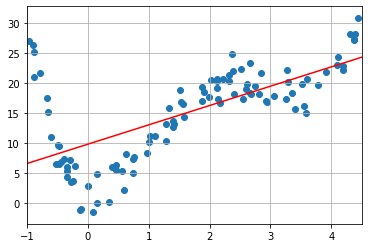

In [77]:
# 求めたパラメータをグラフに表示する

# 求めた関数
def solve_func(x):
    y = ans[0] * x + ans[1]
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100 

# xを生成
# xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# ｘからｙを生成する．
y = solve_func(x)

# グラフ表示
plt.plot(x, y, color='red') # 求めたパラメータから直線を引く

plt.scatter(dataX, dataY) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

## 4. 最小二乗法を適用する(Numpyライブラリで一発で求める)
実はライブラリを使えば，もっと簡単に求めることができる．

In [78]:
# numpyのライブラリを使ってパラメータを求める(次数1)
ans = np.polyfit(dataX, dataY, 1)
print(ans)

[3.21168736 9.83857864]


In [79]:
# numpyのライブラリを使ってパラメータを求める(次数4)
ans = np.polyfit(dataX, dataY, 4)
print(ans)

[ 0.94967058 -7.5899179  17.06125434 -2.90639528  2.20477198]


次数4に対応させるために関数を修正する必要がある

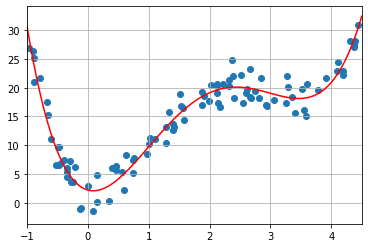

In [80]:
# 求めたパラメータをグラフに表示する

# 求めた関数
def solve_func(x):
    y = ans[0]*x*x*x*x + ans[1]*x*x*x + ans[2]*x*x + ans[3]*x + ans[4]
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100 

# xを生成
# xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# ｘからｙを生成する．
y = solve_func(x)

# グラフ表示
plt.plot(x, y, color='red')

plt.scatter(dataX, dataY) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

## 5. デモ（次数可変版）
次数が増減してもそれに応じて関数を修正する必要がないプログラムを示す．
データ生成と最小二乗法のプログラムを以下にまとめるので，パラメータをいろいろ変更して試してみると良い．

### データ生成
データの個数，乱数の種，標準偏差を変更して様々なデータを生成してみる．

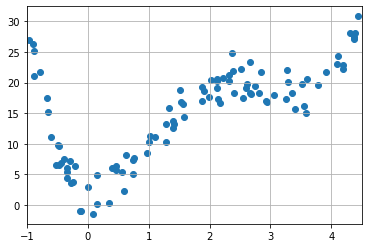

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# 真のモデル
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x + 1
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100

# 乱数の種を設定
np.random.seed(0)

# ランダムにxを生成して，昇順にソート
dataX = (xmax - xmin) * np.random.rand(num) + xmin
dataX = np.sort(dataX)

# xからｙを生成する
dataY = mathfunc(dataX)

# yにノイズ（正規乱数（平均0．0， 標準偏差2.0））を加える
dataY += np.random.normal(loc=0.0, scale=2.0, size=num)

# グラフ表示
plt.scatter(dataX, dataY) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

### 最小二乗法
次数を変更してみる．

次数が多くなるほど，過学習していることがわかる．

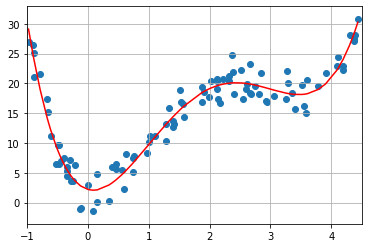

In [83]:
# 次数
dim = 4

# 最小二乗法でパラメータを求める．
ans = np.polyfit(dataX, dataY, dim)


# 求めたパラメータをグラフに表示する

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100 

# xを生成
# xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# ｘからｙを生成する．
y = solve_func(x)

# グラフ表示
# 求めたパラメータから，それを係数とする多項式を作る．
plt.plot(dataX, np.poly1d(ans)(dataX),color='red')

plt.scatter(dataX, dataY)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()